# 1. Import and Install Dependencies

In [ ]:
%pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [63]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [64]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [65]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [66]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [67]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [68]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

2023-10-04 22:33:07.045 Python[23923:607080] CMIOMS: PlugIn unhandled hasPropertyWithAddress for Unknown selector: ddsc
2023-10-04 22:33:07.045 Python[23923:607080] CMIOMS: HardwarePlugIn_ObjectHasProperty PlugIn(33) Unknown selector: ddsc self=0x29d7a9028 hasProperty=0


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

2023-10-04 22:33:15.214 Python[23923:607845] CMIOMS: PlugIn unhandled hasPropertyWithAddress for Unknown selector: ddsc
2023-10-04 22:33:15.214 Python[23923:607845] CMIOMS: HardwarePlugIn_ObjectHasProperty PlugIn(33) Unknown selector: ddsc self=0x29d7a9028 hasProperty=0
2023-10-04 22:33:15.268 Python[23923:580628] CMIOMS: HardwarePlugIn_ObjectHasProperty Device(34) kCMIODevicePropertyDeviceIsRunningSomewhere self=0x29d7a9028 hasProperty=1
2023-10-04 22:33:15.268 Python[23923:580628] CMIOMS: HardwarePlugIn_ObjectGetPropertyData Device(34) kCMIODevicePropertyDeviceIsRunningSomewhere self=0x29d7a9028 data(int)=1


In [69]:
draw_landmarks(frame, results)

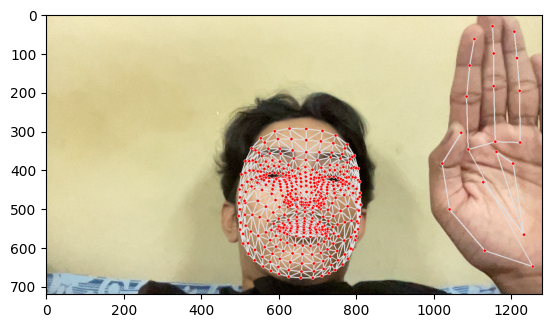

In [70]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [71]:
len(results.left_hand_landmarks.landmark)

21

In [72]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [73]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [74]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [75]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [76]:
result_test = extract_keypoints(results)

In [77]:
result_test

array([ 0.53246856,  0.67123026, -1.01918817, ...,  0.        ,
        0.        ,  0.        ])

In [78]:
np.save('0', result_test)

In [79]:
np.load('0.npy')

array([ 0.53246856,  0.67123026, -1.01918817, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [80]:
# words
# actions = np.array(['come', 'sleep', 'eat', 'yes', 'no', 'good', 'thin', 'more', 'same', 'small', 'flower', 'sun', 'star', 'moon', 'road'])
actions = np.array(['come', 'sleep', 'eat', 'yes', 'no'])
# actions = np.array(['good', 'thin', 'more', 'same', 'small'])
# actions = np.array(['flower', 'sun', 'star', 'moon', 'road'])

In [81]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
# actions = np.array(['do', 'sleep', 'eat', 'yes', 'no'])


# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [82]:
for action in actions: 
    # dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    # for sequence in range(1,no_sequences+1):
    for sequence in range(no_sequences):

        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [83]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

2023-10-04 22:34:21.786 Python[23923:608043] CMIOMS: PlugIn unhandled hasPropertyWithAddress for Unknown selector: ddsc
2023-10-04 22:34:21.786 Python[23923:608043] CMIOMS: HardwarePlugIn_ObjectHasProperty PlugIn(33) Unknown selector: ddsc self=0x29d7a9028 hasProperty=0
2023-10-04 22:42:00.406 Python[23923:608827] CMIOMS: PlugIn unhandled hasPropertyWithAddress for Unknown selector: ddsc
2023-10-04 22:42:00.406 Python[23923:608827] CMIOMS: HardwarePlugIn_ObjectHasProperty PlugIn(33) Unknown selector: ddsc self=0x29d7a9028 hasProperty=0
2023-10-04 22:42:00.484 Python[23923:580628] CMIOMS: HardwarePlugIn_ObjectHasProperty Device(34) kCMIODevicePropertyDeviceIsRunningSomewhere self=0x29d7a9028 hasProperty=1
2023-10-04 22:42:00.484 Python[23923:580628] CMIOMS: HardwarePlugIn_ObjectGetPropertyData Device(34) kCMIODevicePropertyDeviceIsRunningSomewhere self=0x29d7a9028 data(int)=1


In [84]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [85]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [86]:
label_map = {label:num for num, label in enumerate(actions)}

In [87]:
label_map

{'come': 0, 'road': 1, 'good': 2}

In [88]:
# sequences, labels = [], []
# for action in actions:
#     for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
#         window = []
#         for frame_num in range(sequence_length):
#             res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
#             window.append(res)
#         sequences.append(window)
#         labels.append(label_map[action])
sequences, labels = [], []
for action in actions:
    for filename in os.listdir(os.path.join(DATA_PATH, action)):
        try:
            sequence = int(filename)
            window = []
            for frame_num in range(sequence_length):
                res = np.load(os.path.join(DATA_PATH, action, str(
                    sequence), "{}.npy".format(frame_num)))
                window.append(res)
            sequences.append(window)
            labels.append(label_map[action])
        except ValueError:
            # Skip non-integer filenames like ".DS_Store"
            continue


In [89]:
np.array(sequences).shape

(90, 30, 1662)

In [90]:
np.array(labels).shape

(90,)

In [91]:
X = np.array(sequences)

In [92]:
X.shape

(90, 30, 1662)

In [93]:
y = to_categorical(labels).astype(int)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
X_train = X_train.reshape(-1, 30, 1662)

In [95]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [96]:
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential


In [97]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [98]:
model = Sequential()
model.add(LSTM(64, return_sequences=True,
          activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [99]:
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.compile(optimizer='Adam', loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


In [100]:
# model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])
model.fit(X_train, y_train, epochs=650, callbacks=[tb_callback])

Epoch 1/650
3/3 [==============================] - 2s 33ms/step - loss: 1.2828 - categorical_accuracy: 0.4235
Epoch 2/650
3/3 [==============================] - 0s 35ms/step - loss: 18.6435 - categorical_accuracy: 0.2824
Epoch 3/650
3/3 [==============================] - 0s 35ms/step - loss: 10.1612 - categorical_accuracy: 0.3647
Epoch 4/650
3/3 [==============================] - 0s 33ms/step - loss: 7.1770 - categorical_accuracy: 0.3529
Epoch 5/650
3/3 [==============================] - 0s 33ms/step - loss: 12.7304 - categorical_accuracy: 0.3176
Epoch 6/650
3/3 [==============================] - 0s 35ms/step - loss: 18.6192 - categorical_accuracy: 0.4118
Epoch 7/650
3/3 [==============================] - 0s 35ms/step - loss: 53.7659 - categorical_accuracy: 0.4471
Epoch 8/650
3/3 [==============================] - 0s 34ms/step - loss: 57.0873 - categorical_accuracy: 0.3059
Epoch 9/650
3/3 [==============================] - 0s 33ms/step - loss: 83.5629 - categorical_accuracy: 0.2706
Epo

In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

# 8. Make Predictions

In [102]:
res = model.predict(X_test)

1/1 [==============================] - 0s 203ms/step


In [103]:
actions[np.argmax(res[0])]

'come'

In [104]:
actions[np.argmax(y_test[0])]

'come'

# 9. Save Weights

In [105]:
model.save('action.h5')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# del model

In [106]:
# import tensorflow as tf
# model = tf.keras.models.Sequential()
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [107]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [108]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 22ms/step


In [109]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [110]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 0],
        [0, 5]]])

In [111]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [112]:
from scipy import stats

In [113]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [114]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

2023-10-04 22:45:01.035 Python[23923:616679] CMIOMS: PlugIn unhandled hasPropertyWithAddress for Unknown selector: ddsc
2023-10-04 22:45:01.035 Python[23923:616679] CMIOMS: HardwarePlugIn_ObjectHasProperty PlugIn(33) Unknown selector: ddsc self=0x29d7a9028 hasProperty=0


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

2023-10-04 22:46:43.585 Python[23923:616679] CMIOMS: PlugIn unhandled hasPropertyWithAddress for Unknown selector: ddsc
2023-10-04 22:46:43.586 Python[23923:616679] CMIOMS: HardwarePlugIn_ObjectHasProperty PlugIn(33) Unknown selector: ddsc self=0x29d7a9028 hasProperty=0
2023-10-04 22:46:43.646 Python[23923:580628] CMIOMS: HardwarePlugIn_ObjectHasProperty Device(34) kCMIODevicePropertyDeviceIsRunningSomewhere self=0x29d7a9028 hasProperty=1
2023-10-04 22:46:43.647 Python[23923:580628] CMIOMS: HardwarePlugIn_ObjectGetPropertyData Device(34) kCMIODevicePropertyDeviceIsRunningSomewhere self=0x29d7a9028 data(int)=1


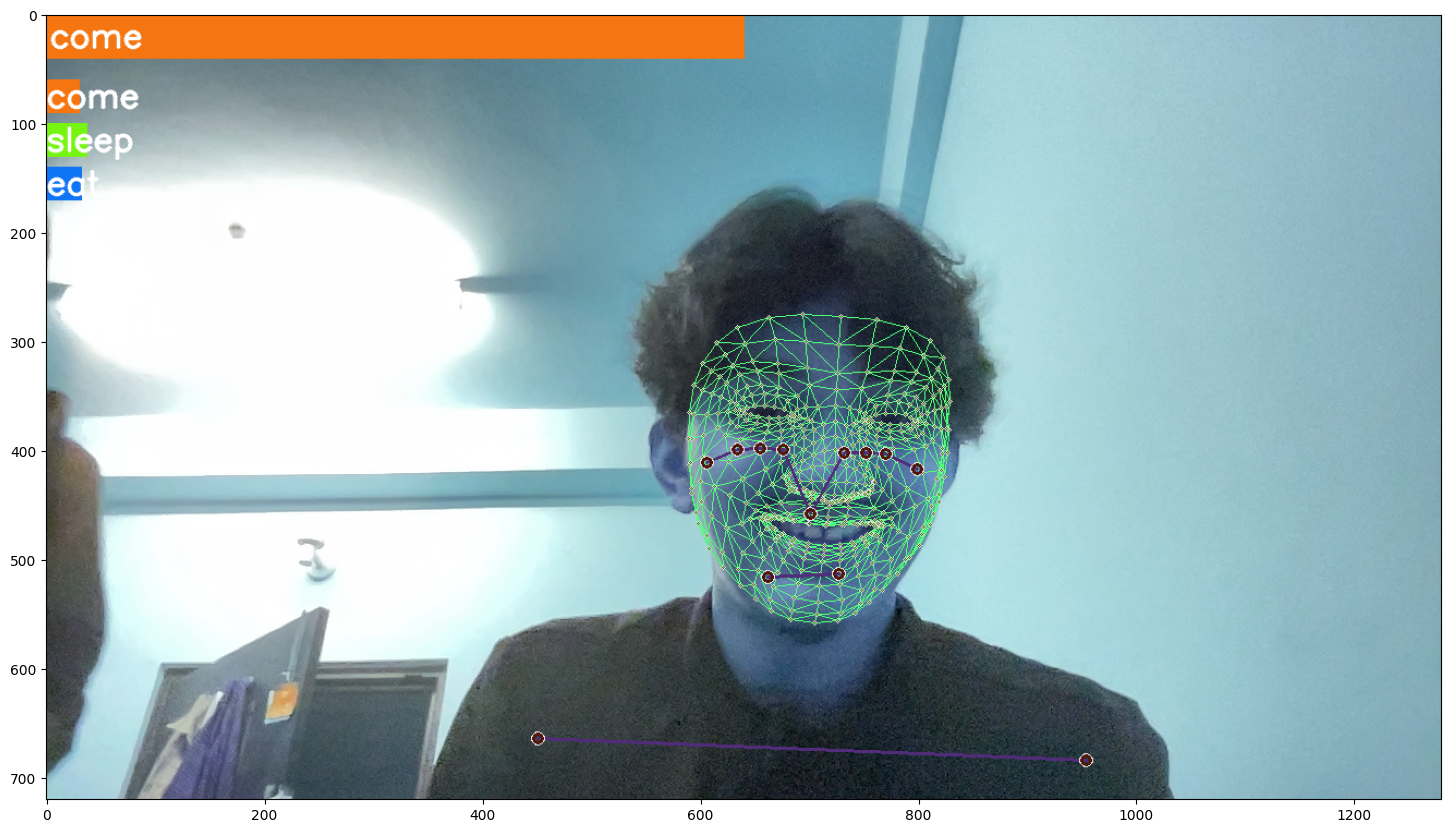

In [68]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))